In [173]:
from pipetorch import hotel
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import torch
import matplotlib.pyplot as plt

from torch import nn, optim
import torch.nn.functional as F
from pipetorch import hotel_test, hotel_test_score

In [174]:
df = hotel()
test_x = hotel_test()

In [175]:
test_x

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
25326,164,2017,April,14,2,1,0,2,0.0,0,...,A,0,No Deposit,9.0,NaN,0,Transient,99.00,0,2
25327,44,2017,April,14,2,2,0,2,0.0,0,...,A,0,No Deposit,9.0,NaN,0,Transient,102.60,0,0
25328,128,2017,April,14,2,2,0,2,0.0,0,...,A,0,No Deposit,9.0,NaN,0,Transient,99.00,0,1
25329,77,2017,April,14,2,2,0,2,0.0,0,...,A,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0
25330,27,2017,April,14,2,2,1,2,0.0,0,...,D,0,No Deposit,9.0,NaN,0,Transient,150.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,23,2017,August,35,30,2,5,2,0.0,0,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
79326,102,2017,August,35,31,2,5,3,0.0,0,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
79327,34,2017,August,35,31,2,5,2,0.0,0,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
79328,109,2017,August,35,31,2,5,2,0.0,0,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


/opt/jupyterhub/anaconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

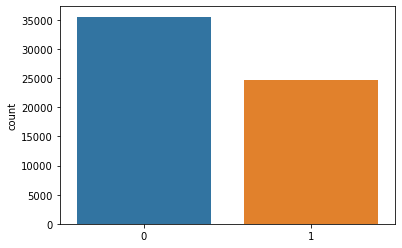

In [176]:
sns.countplot(df['IsCanceled'].values)

In [177]:
df['DaysInWaitingList'].sum()

251732

In [178]:
cols = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','BookingChanges','DaysInWaitingList','TotalOfSpecialRequests','IsCanceled']

df = df[cols]

cols_v2 = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','BookingChanges','DaysInWaitingList','TotalOfSpecialRequests']

test_x = test_x[cols_v2]
test_x.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,BookingChanges,DaysInWaitingList,TotalOfSpecialRequests
25326,164,1,0,2,0.0,0,0,0,2
25327,44,2,0,2,0.0,0,0,0,0
25328,128,2,0,2,0.0,0,0,0,1
25329,77,2,0,2,0.0,0,0,0,0
25330,27,2,1,2,0.0,0,0,0,0


In [179]:
df = df.dropna(how='any')

In [180]:
df.IsCanceled.value_counts() / df.shape[0]

0    0.589704
1    0.410296
Name: IsCanceled, dtype: float64

In [181]:
len(test_x)

19033

In [182]:
X = df[['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','BookingChanges','DaysInWaitingList','TotalOfSpecialRequests']]
y = df[['IsCanceled']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
dummyencoder = ColumnTransformer(remainder='passthrough', transformers=[('dummies', encoder, cols_v2)])

In [196]:
dummyencoder.fit(X_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [183]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_valid = torch.from_numpy(X_valid.to_numpy()).float()
test_x = torch.from_numpy(test_x.to_numpy()).float()
y_valid = torch.squeeze(torch.from_numpy(y_valid.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([48234, 9]) torch.Size([48234])
(12059, 9) torch.Size([12059])


In [184]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

net = Net(X_train.shape[1])

In [185]:
criterion = nn.BCELoss()


In [186]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [187]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_valid = X_valid.to(device)
y_valid = y_valid.to(device)
net = net.to(device)
criterion = criterion.to(device)

In [188]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [189]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(1000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_valid)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_valid)
      test_acc = calculate_accuracy(y_valid, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
Train set - loss: 0.792, accuracy: 0.411
Test  set - loss: 0.795, accuracy: 0.406

epoch 100
Train set - loss: 0.76, accuracy: 0.411
Test  set - loss: 0.763, accuracy: 0.406

epoch 200
Train set - loss: 0.741, accuracy: 0.411
Test  set - loss: 0.743, accuracy: 0.406

epoch 300
Train set - loss: 0.727, accuracy: 0.411
Test  set - loss: 0.728, accuracy: 0.406

epoch 400
Train set - loss: 0.715, accuracy: 0.411
Test  set - loss: 0.716, accuracy: 0.406

epoch 500
Train set - loss: 0.705, accuracy: 0.411
Test  set - loss: 0.706, accuracy: 0.406

epoch 600
Train set - loss: 0.698, accuracy: 0.411
Test  set - loss: 0.698, accuracy: 0.406

epoch 700
Train set - loss: 0.692, accuracy: 0.588
Test  set - loss: 0.692, accuracy: 0.593

epoch 800
Train set - loss: 0.688, accuracy: 0.589
Test  set - loss: 0.687, accuracy: 0.594

epoch 900
Train set - loss: 0.684, accuracy: 0.589
Test  set - loss: 0.684, accuracy: 0.594



In [190]:
MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

In [191]:
classes = ['No cancellation', 'canceletion']
y_pred = net(X_valid)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_valid.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

                 precision    recall  f1-score   support

No cancellation       0.59      1.00      0.75      7162
    canceletion       0.00      0.00      0.00      4897

       accuracy                           0.59     12059
      macro avg       0.30      0.50      0.37     12059
   weighted avg       0.35      0.59      0.44     12059



/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


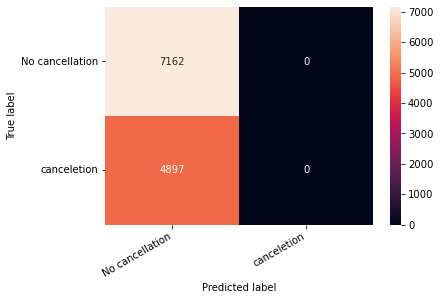

In [192]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [193]:
score = hotel_test_score(y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [19033, 12059]